In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

# 1. 표준 편차 ( std : standard deviation )

- 여기서 $N$  은 모집단의 전체 개수

$$
\sigma = \sqrt{\frac{\Sigma_{i=1}^N (\mu - X_i)^2}{N}}
$$

$$
\text{std}(x) = \sigma = \sqrt{\sigma^2}
$$

- 표준 편차의 의미 : 데이터의 분포도
    - 작다 : 데이터가 몰려 있다.
    - 크다 : 데이터가 퍼져 있다.
- Pandas 의 데이터프레임은 표본집단의 기준으로 계산한다 즉
    - $s$ = 표본집단의 표준편차 여기서 $n$ 은 표본 집단 안의 표본 수

$$
s = \sqrt{\frac{\Sigma_{i=1}^n (\bar{X}- X_i)^2}{n-1}}
$$

- std 값 계산하여 비교해보기 (아래와 같이 n-1을 해야 pandas 계산 값 이랑 같아진다.

In [19]:
data = {
    "math" :    [89,76,72,95],
    "english" : [76,75,89,76], 
    "science" : [95,90,79,88],
}

df = pd.DataFrame(data=data, index=["ha","heo","na","park"])
df["math"].std() #10.801234497346433

np.float64(10.801234497346433)

In [20]:
frac_upper = ((df["math"] - df["math"].mean()) ** 2).sum()
frac_lower = df["math"].__len__() - 1 # 여기에서 n-1을 해줘야 같아진다. <--**

std_calced = np.sqrt(frac_upper/frac_lower)

np.sqrt(frac_upper/frac_lower) #10.801234497346433

np.float64(10.801234497346433)


# 2. Correlation

- 두 변수의 상관관계를 수치화 한 것
- 범위는 -1 에서 1 사이의 값
- 종류:
    - Pearson : Numerical 데이터 일 때
    - Spearman : Numerical, Categorical, Ordinal 데이터 일 때
    - 등 등…

## 2-1 Pearson 상관계수

- 두 데이터의 선형 관계를 파악한다.
- **이상치에 민감하다.**
- 상관 계수 :
    
    $$
    r_{xy} = \frac{Cov(x,y)}{ \sigma_x \sigma_y}
    $$
    
    $\sigma$ 는 각 집단의 표준 편차
    
    - 공분산
        
        $$
        \text{Cov}(x,y) = \Sigma_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})
        $$
        
        여기서 $\bar{x}$, $\bar{y}$ 는 각 표본 집단의 평균
        
- pearson  상관계수 구해보고, 히트 맵 이미지로 뽑아보기

**상관계수는 기울기를 반영한 것은 아님!**

[(70.0, 100.0), (70.0, 100.0)]

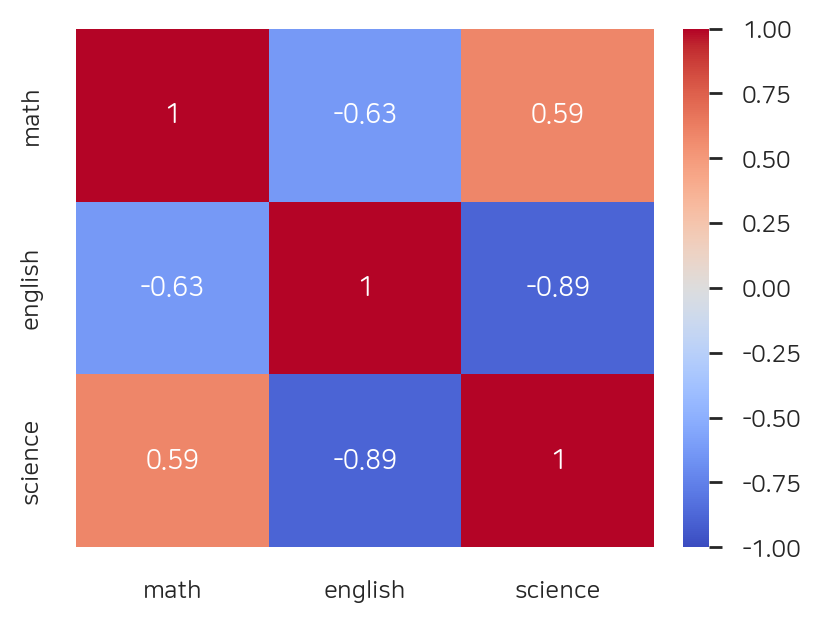

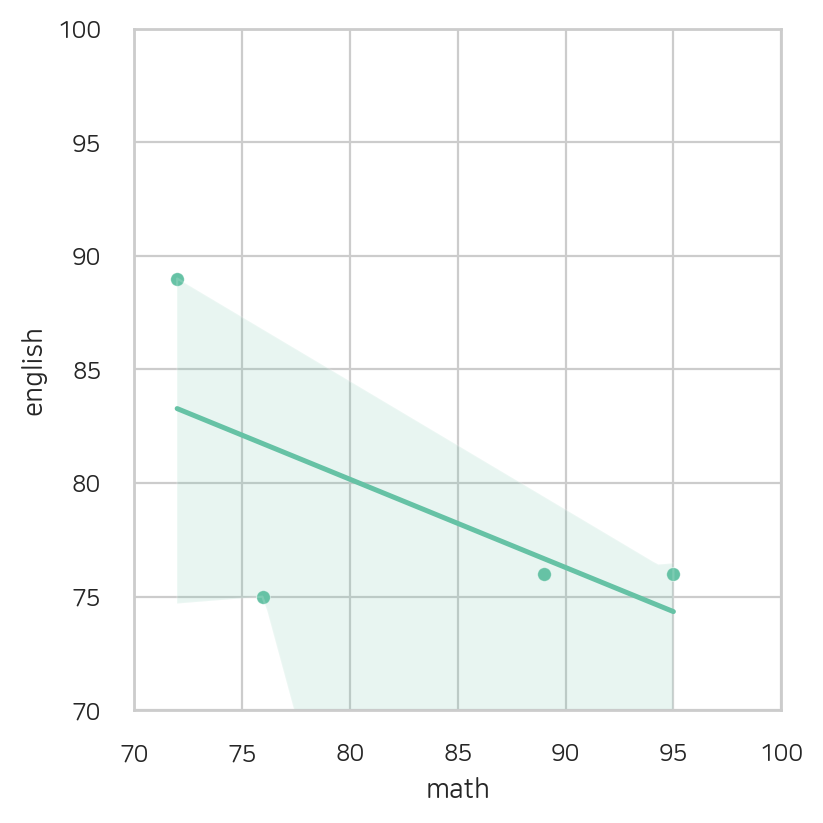

In [21]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
sns.heatmap(data=df.corr(method="pearson"),
            annot=True,
            vmax=1, vmin=-1,
            cmap="coolwarm",
            ax=ax)

fig, ax = plt.subplots(1,1, figsize=(4,4))

sns.scatterplot(data=df,
                x="math",
                y="english",
                ax=ax)
sns.regplot(data=df, # 회귀선 그리기
                x="math",
                y="english",
                ax=ax)
ax.set(xlim=[70,100], ylim=[70,100])



## 2-2 Spearman 상관계수

- 두 데이터의 순위의 선형 관계를 파악한다. 단조 관계를 잘 반영한다.
- Numerical 이나 Ordinal 상관 관계를 잘 분석한다.
- **이상치에 덜 민감하다.**
- 공식
    
    $$
    r_{R(x) R(y)} = \frac{\text{Cov} (R(x),R(y)) }{\sigma_{ R(x)} \sigma_{R(y)}}
    $$
    
    - 단조 증가 일 때는 다르다.
- Spearman 상관계수를 구해보고, 히트 맵 으로 뽑아보기


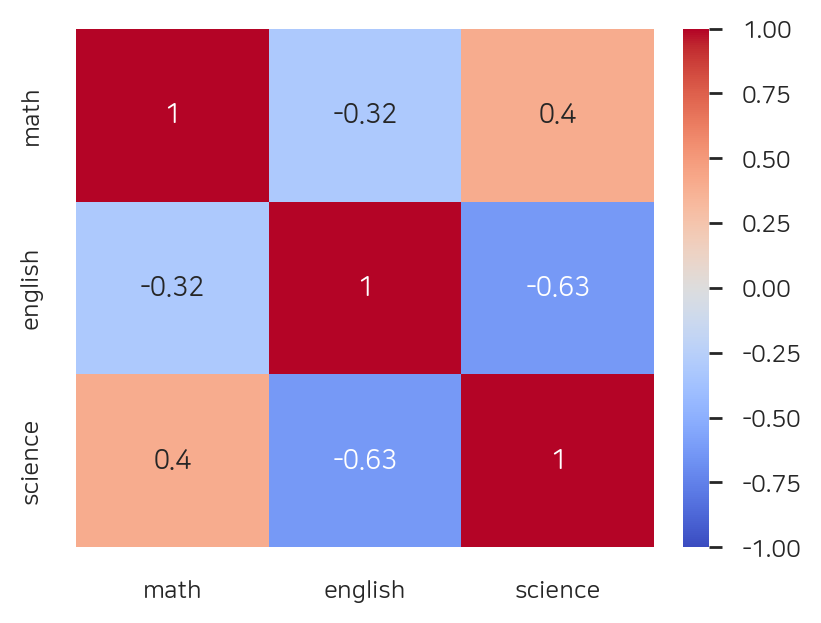

In [22]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
sns.heatmap(data=df.corr(method="spearman"),
            annot=True,
            vmax=1, vmin=-1,
            cmap="coolwarm",
            ax=ax);